# Load Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load data

In [2]:
df = pd.read_csv('/kaggle/input/salary-dataset-simple-linear-regression/Salary_dataset.csv')

In [3]:
df.head(5)

,Unnamed: 0,YearsExperience,Salary
0,0,1.2,39344.0
1,1,1.4,46206.0
2,2,1.6,37732.0
3,3,2.1,43526.0
4,4,2.3,39892.0


# Check data

### Statistics

In [4]:
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


## Clean dataset

In [5]:
df.drop('Unnamed: 0',axis=1,inplace=True)

In [6]:
check_nan = df.isnull().values.any()
print(check_nan)

False


In [7]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [8]:
df.duplicated().sum()

0

# Analysis

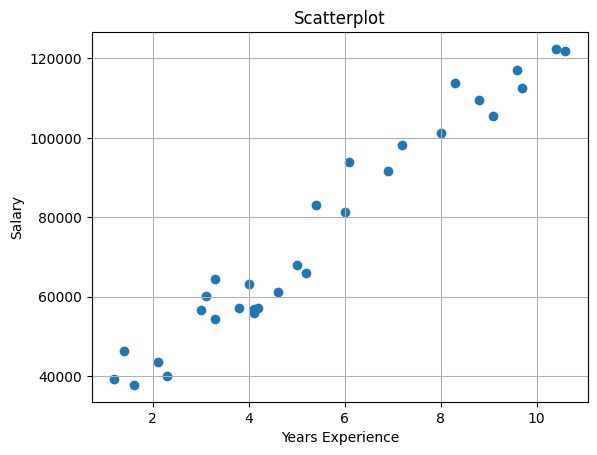

In [9]:
plt.scatter(x=df['YearsExperience'],y=df['Salary']) 
plt.title('Scatterplot')
plt.xlabel('Years Experience')
plt.ylabel('Salary')
plt.grid(True)
plt.show()

Linear Regresion looks like a perfect fit.

### Split data

In [10]:
from sklearn.model_selection import train_test_split

X=df['YearsExperience']
y=df['Salary']

# 70/30 split for training/testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [11]:
print(X_train.shape)
print(y_train.shape)

(21,)
(21,)


In [12]:
# Reshape to have shape (21, 1)
X_train = np.array(X_train).reshape(-1, 1)
y_train = np.array(y_train).reshape(-1, 1)
X_test = np.array(X_test).reshape(-1, 1)


print(X_train.shape)  
print(y_train.shape)
print(X_test.shape)

(21, 1)
(21, 1)
(9, 1)


### Build Model

In [13]:
from sklearn.linear_model import LinearRegression

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

LinearRegression()

### Prediction

In [14]:
y_prediction = model.predict(X_test)
print(y_prediction)

[[115574.62288352]
 [ 71680.93878159]
 [102499.90847018]
 [ 75416.57147111]
 [ 55804.4998511 ]
 [ 60474.04071301]
 [122111.98009019]
 [107169.44933209]
 [ 63275.76523015]]


### Visualize

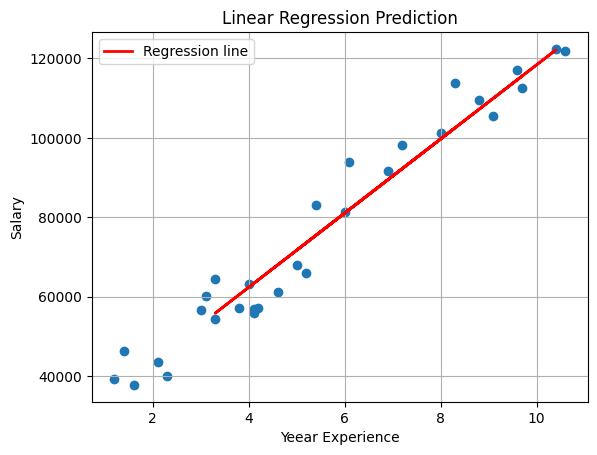

In [15]:
# scatter plot
plt.scatter(x=df['YearsExperience'], y=df['Salary'])

# plotting the regression line (predictions)
plt.plot(X_test, y_prediction, color='red', linewidth=2, label='Regression line')

# labeling the plot
plt.xlabel('Yeear Experience')
plt.ylabel('Salary')
plt.title('Linear Regression Prediction')
plt.legend()
plt.grid(True)

In [16]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Compute statistics
mae = mean_absolute_error(y_test, y_prediction)
mse = mean_squared_error(y_test, y_prediction)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_prediction)

# Print the statistics
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R^2 (Coefficient of Determination): {r2}")

Mean Absolute Error (MAE): 5161.328710400178
Mean Squared Error (MSE): 37784662.46621308
Root Mean Squared Error (RMSE): 6146.9230079945755
R^2 (Coefficient of Determination): 0.9414466227178215


# Result

The linear regression model captures the underlying trend in the dataset, as evidenced by an R^2 value of 0.9414. This indicates that approximately 94.14% of the variation in the target variable is explained by the model. The RMSE of 6146.92 suggests that the typical prediction error is $6,146.92.